# Machine Learning - "Regression" - Day 2 

Shivam Panchal

---

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://evrythng.com/wp-content/uploads/machine-learning-diagram02-900x535.png")

Welcome to the post, the article is a 8-10 minutes read. I will not bore you much with the theory behind, I will try to put it as easy as possible.

In this post, we will get deep into applicability of regressive model unlike to the first post which was more likely a beginner introduction to Regression and we will also see how do we interpret a regression model. 

Well, if you haven't see the first post, here is the link for you, please do check. 

Link: https://www.linkedin.com/pulse/machine-learning-regression-day-1-shivam-panchal

The main objective of the post will also include the understanding of the various assumptions in Regression model. Moreover, we will also discuss what if these assumptions get violated, how do you build your linear regression model then.

Believe me, regression is not just fitting a line to the predicted values or defining it as an equation (y = m*x + b) like I did in the previous post, there is so much into it. That’s the main idea of this post. I had to recollect my thoughts on these things again today for this post.

One more thing, I would like to mention is that, regression is considered to be the simplest algorithm in ML. When we start playing with ML, most of us start with regression, but it is not understood well by the beginners, I was asked a few questions in one of my initial technical interviews when I applied to a job sometime back. I wasn't comfortable that time, It is important and these things describe how well you understand the math behind ML.


So make sure, Machine Learning is not just loading classes from sci-kit learn and fitting data and predicting targets, it is something more than that. 

---

So, let’s begin the Day 2nd!!

---

**Regression** is a parametric approach by saying it a ‘Parametric’ approach, I mean it is going to make assumptions about your data for the purpose of analysis. And, because of this reason, it has some limited uses and other regression techniques like tree based regression and deep nets are used practically. Linear Regression surely fails to deliver good results with data sets which doesn’t fulfill its assumptions. **Therefore, for a successful regression analysis, it’s essential to validate these assumptions.**

So, how would you check if your Mr. Data Set follows all regression assumptions?

> So, let’s look at the important assumptions in regression analysis one by one.

> **1.Relationship:** There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set and it will be counted as a mistake of your life. 

> **Solution:** To solve this, you should look for residual vs fitted value plots . Also, you can include polynomial terms (X, X², X³) in your model to capture the non-linear effect.

> **Residual vs Fitted Values -** This scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values). It is one of the most important plot which everyone must learn. It reveals various useful insights including outliers. The outliers in this plot are labeled by their observation number which make them easy to detect.

> There are two major things which you should learn:

> If there exist any pattern (may be, a parabolic shape) in this plot as you can see above, consider it as signs of non-linearity in the data. It means that the model doesn’t capture non-linear effects. Introduce the non-linearity by doing transformations. You can do a non-linear transformation of predictors such as log (X), √X or X² transform the dependent variable.



> **2. Auto Correlation:**  No correlation between the residual (error) terms. The presence of correlation in error terms affects your model’s accuracy. 

> **Solution:** Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. 



> **3. Multicollinearity:** The independent variables should not be correlated.  It is said to be existing when the independent variables are found to be moderately or highly correlated. It becomes difficult to find out which variable is actually contributing to predict the response variable, the standard errors tend to increase. And, with large standard errors, the confidence interval becomes wider leading to less precise estimates of coefficients.That’s not good!

> **Solution:** You can use scatter plot to visualize correlation effect among variables. Define a correlations threshold in your mind and say good bye to the highly correlated variables.



> **4. Heteroscedasticity :** The error terms must have constant variance. This phenomenon is known as homoscedasticity. The presence of non-constant variance is referred to heteroscedasticity. Generally, it arises in presence of outliers or extreme values. And then these values get too much weight, thereby affecting the model’s performance.


> **Solution:** Put your eyes again on the residual vs fitted values plot. If heteroscedasticity exists, the plot would exhibit a funnel shape pattern. If a funnel shape is evident in the plot, consider it as the signs of non-constant variance i.e. heteroscedasticity. To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroscedasticity.



> **5. Normal Distribution of error terms:** The error terms must be normally distributed. If the error terms (residuals) are non- normally distributed, confidence intervals may become too wide or narrow. Model deteriorates.

> **Solution:** Check again the QQ plot. Your residuals should incline the mod line, i.e. 45 degree line there, if it is not aligned, there is not normal distribution in your residuals, your model has some problems, perform transformations and optimise your QQ plot.


> **Normal Q-Q Plot -** It is a scatter plot which helps us validate the assumption of normal distribution in a data set. Using this plot we can infer if the data comes from a normal distribution. If yes, the plot would show fairly straight line. Absence of normality in the errors can be seen with deviation in the straight line. If the errors are not normally distributed, non – linear transformation of the variables (response or predictors) can bring improvement in the model.

#### Let's start a byte of coding!!!

### Import the required libraries and load the dataset

In [2]:
import copy
import math
import time
import itertools
import numpy as np
import pandas as pd

import statsmodels.api as sm
import scipy.stats as scipystats
import statsmodels.stats as stats 
import statsmodels.formula.api as smf
from itertools import chain, combinations
import statsmodels.stats.stattools as stools
from statsmodels.graphics.regressionplots import *
from sklearn.cross_validation import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 12

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
from sklearn.datasets import load_boston

In [3]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
print("Column Names", list(dataset.feature_names))
print("Number of Columns", len(dataset.feature_names))

('Column Names', ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
('Number of Columns', 13)


#### Check for miussing values

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

#### No missing values

### Exploratory Data Visualization

To make your plots beautiful to **you**, you should use use different styles in the plt.

In [8]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

You can choose any of them

In [9]:
plt.style.use('fivethirtyeight')

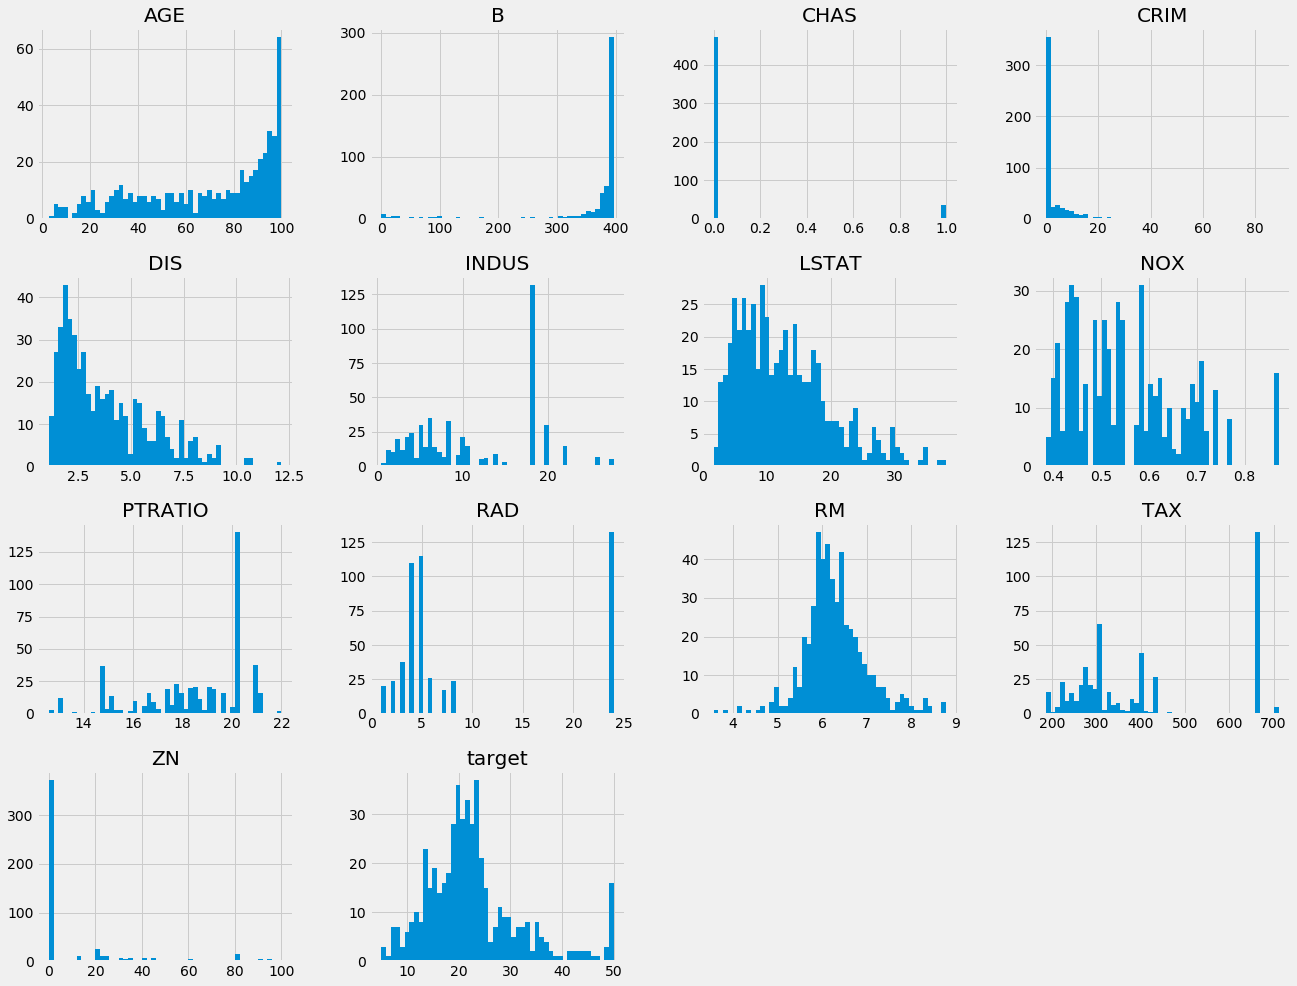

In [10]:
df.hist(bins=50, figsize=(20,16))
plt.show()

D:\Users\Shivam\Anaconda2\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


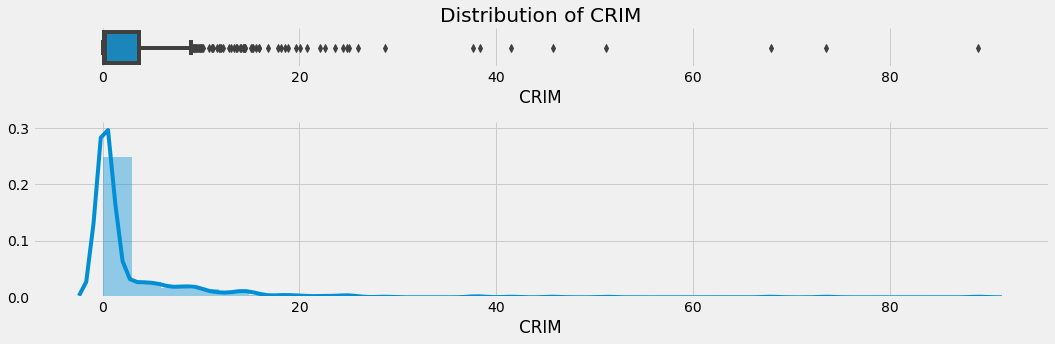

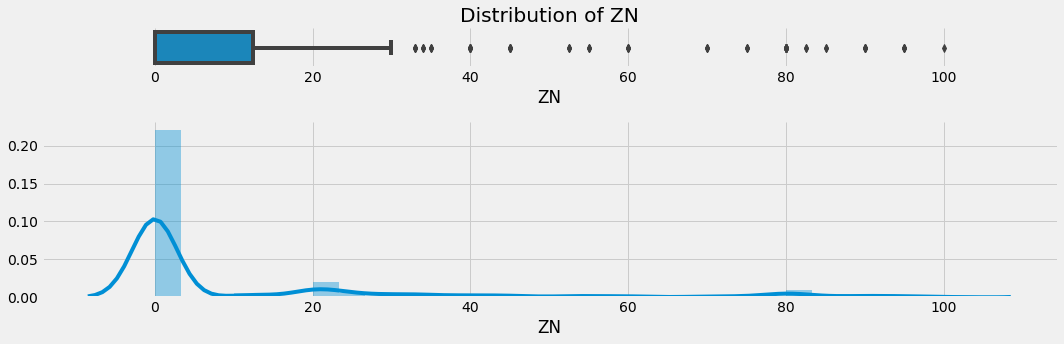

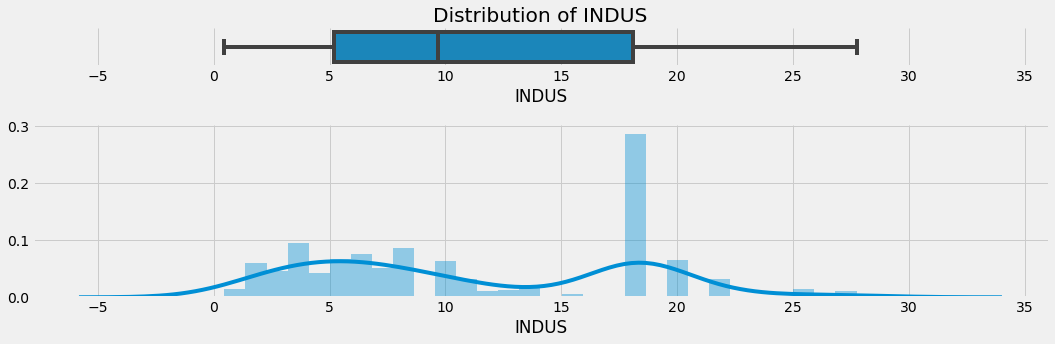

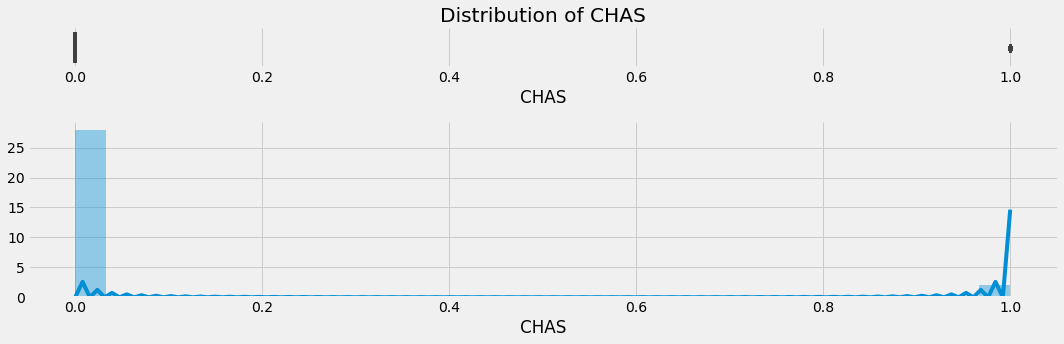

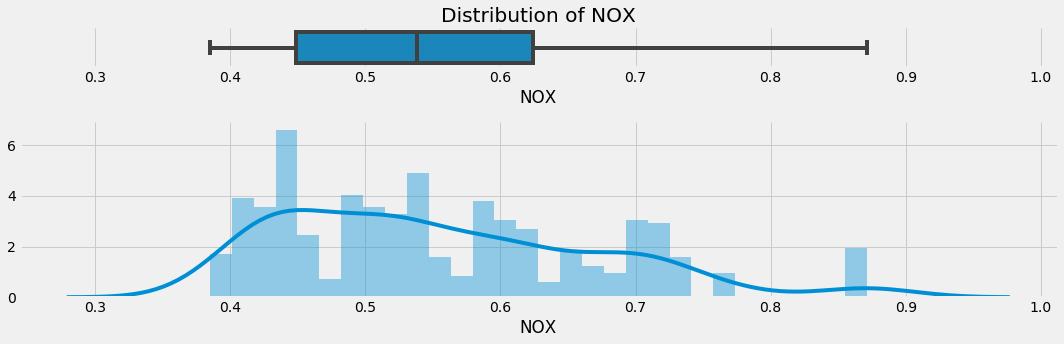

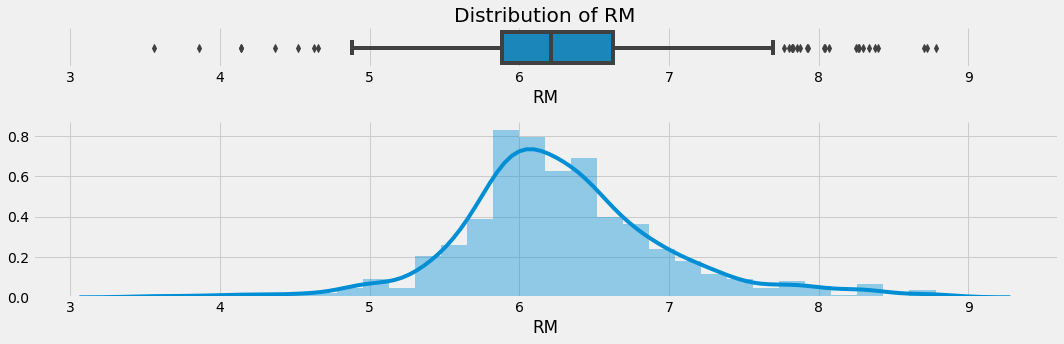

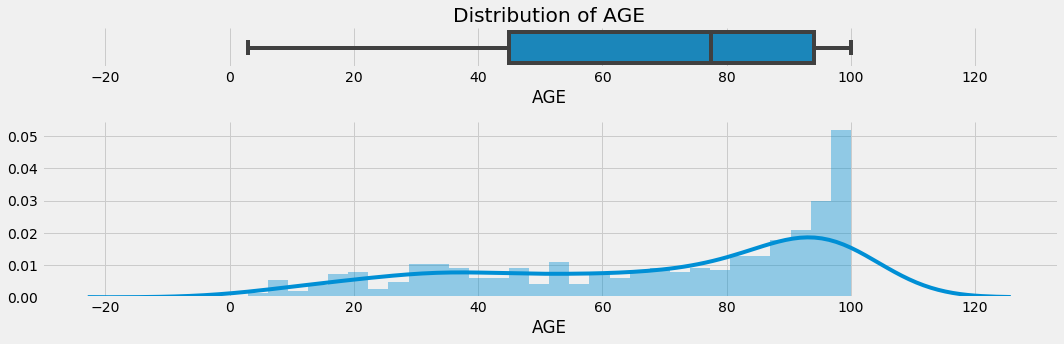

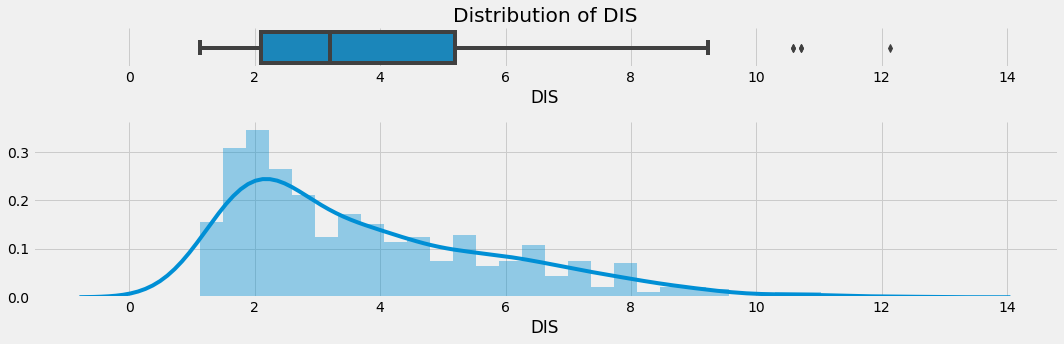

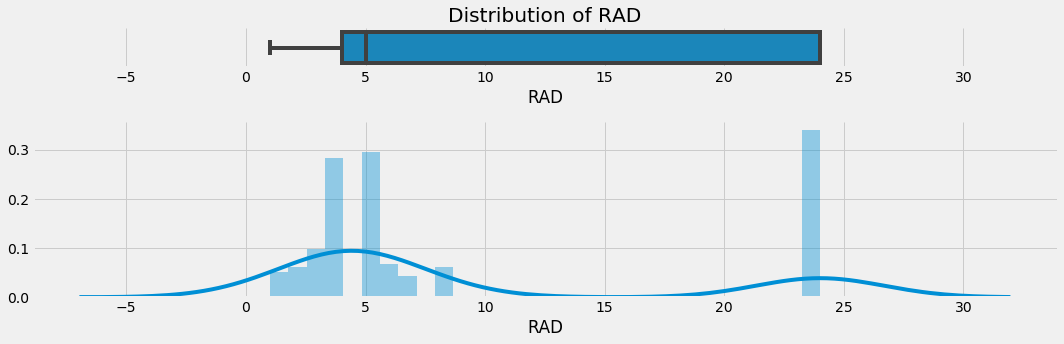

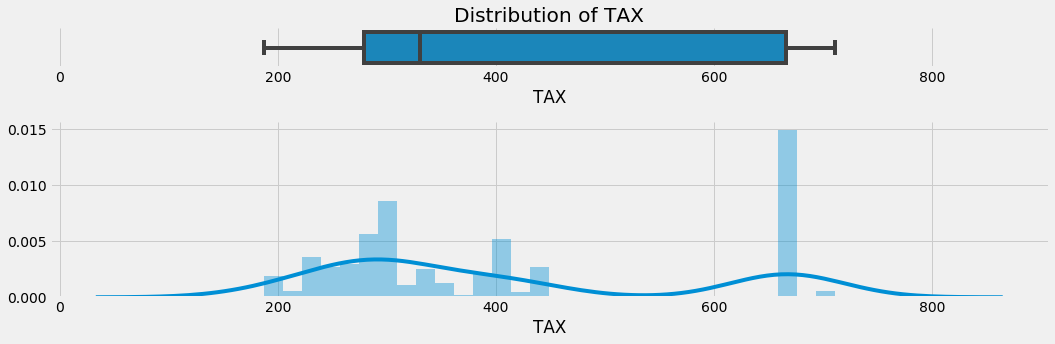

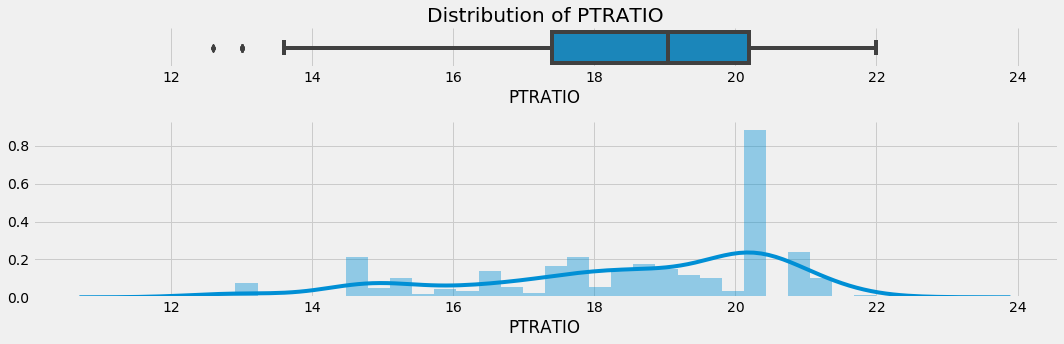

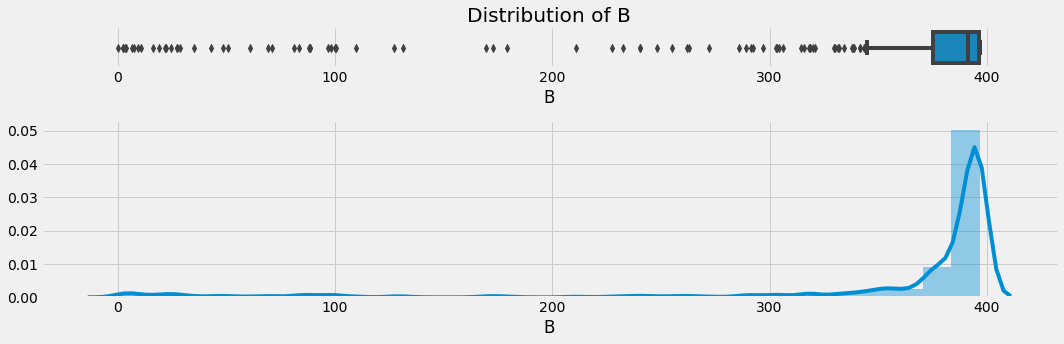

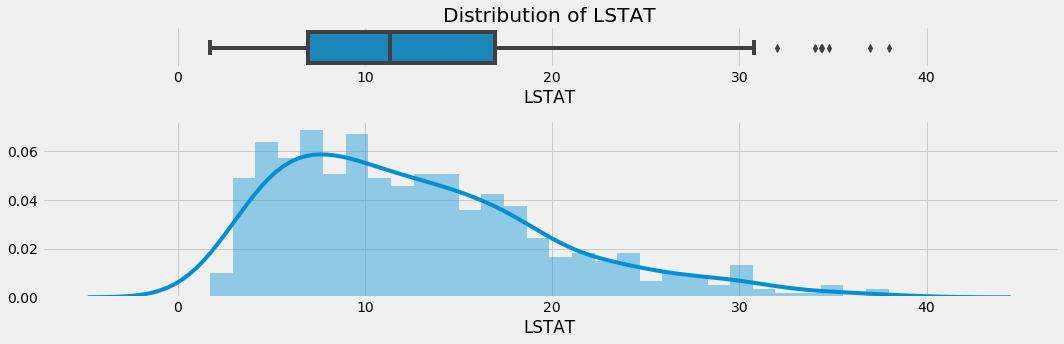

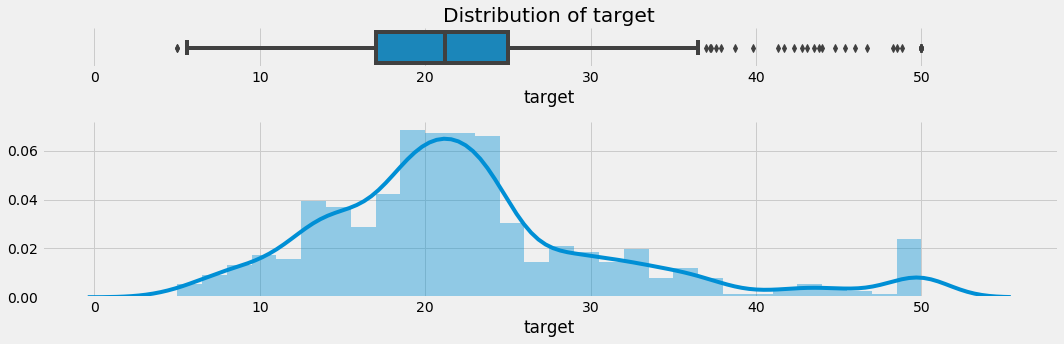

In [11]:
def plot_df(col):
    x = df[col]
    f, (ax_box, ax_hist) = plt.subplots(2,sharex = True,gridspec_kw={"height_ratios": (.20, .90)}, figsize = (15,5))
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x, ax=ax_hist,bins=30)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box)
    ax_box.set(title='Distribution of ' + col)
    plt.tight_layout()
    
for col in df.columns:
    plot_df(col)

### Perform Correlation Analysis

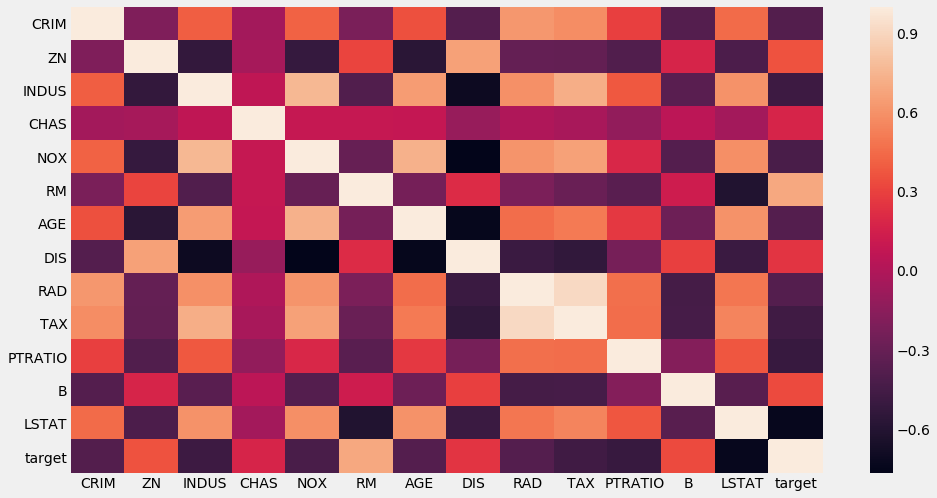

In [12]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [13]:
cmap = cmap=sns.diverging_palette(10, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "9pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '300px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1,-0.2,0.4,-0.055,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.4,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.055,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.62,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


---

## Start building your regresssion model and analyze it 

---

I am going to use the same dataset - Boston Housing Dataset, I used in first post! 

**The main objective will not be to build a super predictive model doing feature engineering or hyper-parameter tuning, we just want to explain the assumpations of regression model and and to learn how to inpterpret the same.**

let's roll!

In [14]:
#### Consider only two predictors to build the model
lm = smf.ols(formula = "target ~ CRIM + ZN", data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     76.21
Date:                Sun, 25 Feb 2018   Prob (F-statistic):           1.23e-29
Time:                        04:53:40   Log-Likelihood:                -1773.3
No. Observations:                 506   AIC:                             3553.
Df Residuals:                     503   BIC:                             3565.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4668      0.442     50.862      0.0

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the RM coefficient (9.1021) by first noticing that the p-value (under P>|t|) is so small, basically zero. 

## NOTES

**Point 1 :** 

Typically, we use the coefficient p-values to determine which terms (variables) to keep in the regression model. 

**Point 2 :Goodness of fit – R2 **


To get a better model, it’s helpful to consider the coefficient of determination R2. R2 measures how much of the variation in the response variable y is explained by variation in the regressors X.

Always make this as your best model evaluation technique for regression problems.

R-squared: 0.233
So, bad this model is!!
We need to make this value closer to one! It shows basically how well your y is learning the X.
P - value is low, F - stat is high, we will consider these together, make sure that you use p-val and F-stat to compare the similar models. It is not universal evaluation!!  

### Check for relationship 
Let's plot the Residual vs Fitted Values

In [15]:
predictions = lm.predict(df.iloc[:,:13])
residual = df["target"].values - predictions

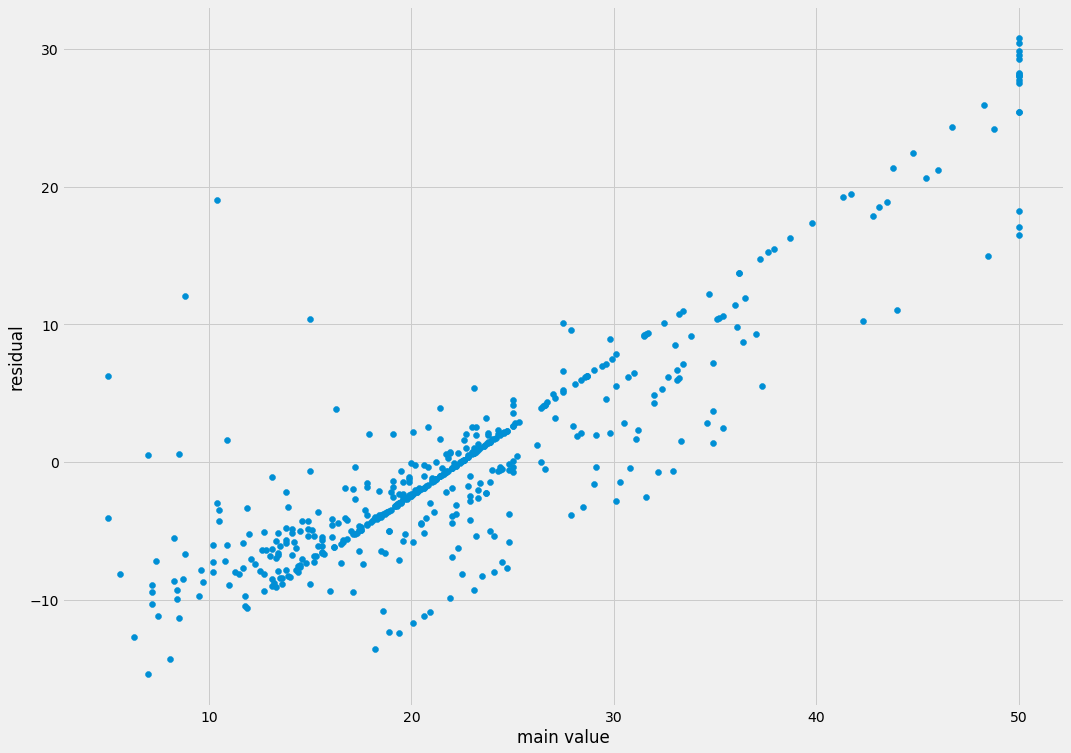

In [16]:
plt.scatter(df[["target"]].values,residual)
plt.xlabel("main value")
plt.ylabel("residual")
plt.show()

### No strong pattern is obtained, but there is a constant spread.
We will see, if this spread exsists with other variables.

## Check for normality
We will also plot the QQ plot to check for the normality

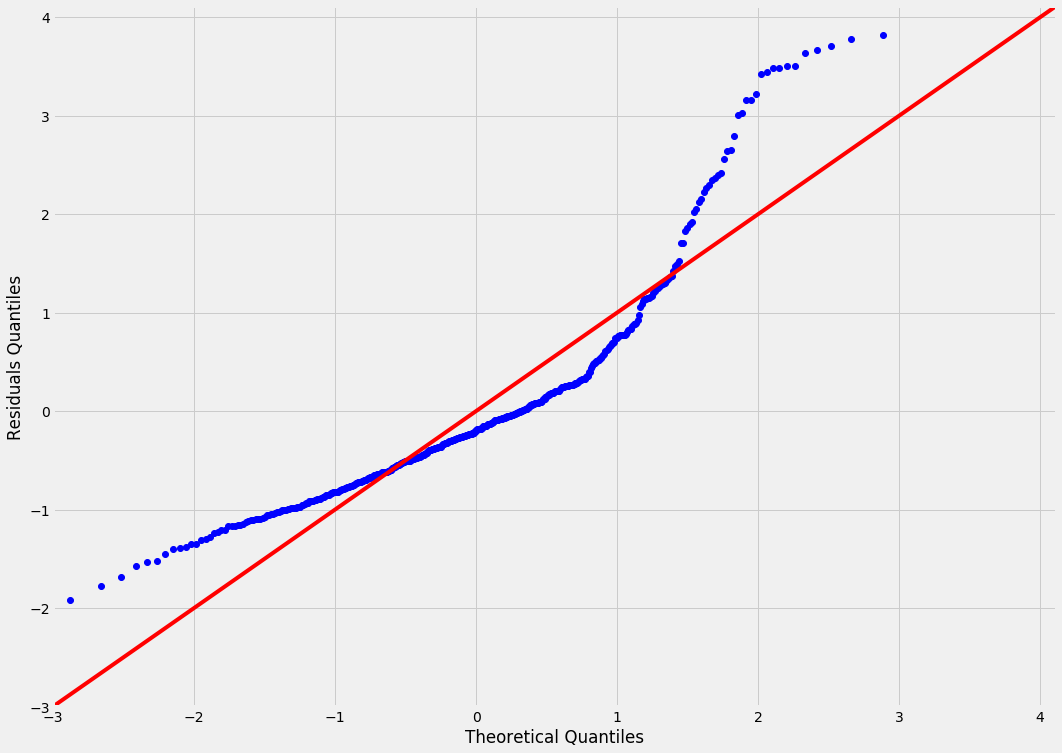

In [17]:
sm.qqplot(residual, fit= True, line ='45')
plt.ylabel("Residuals Quantiles")
plt.show()

If the residuals follow a normal distribution, the plot will align with the theoretical 45° diagonal line. So we can see from the graph that in general the residual quantiles follow that trend, but deviate at the end and take off pretty far above the theoretical line.

I think fitted vs. residuals plot gives us a direct visual representation of how those residuals distribute. While q-q plot gives us a more straightforward comparision of how close/different it is from the normal distribution. So it would be great to use both graphs together to complement each other in regression analysis.

The outliers are concentrated in the tail end of the data as shown in the q-q plot. It might indicate that data are skewed instead of normally distributed, or the linear regression model just doesn't capture the variable relationships that well when response values are high.

### Let's bring out some more predictors into considerations

In [18]:
lm = smf.ols(formula = "target ~ CRIM + ZN + CHAS + NOX + DIS + RAD + TAX + PTRATIO + RM  + LSTAT", data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sun, 25 Feb 2018   Prob (F-statistic):          2.01e-135
Time:                        04:53:42   Log-Likelihood:                -1505.1
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3079.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5282      4.906      8.465      0.0

R-squared:0.734
It is improved quite well!!

F-stat and p-val showed a good improvement. p- value decreased to a great extent.

In [19]:
predictions = lm.predict(df.iloc[:,:13])
residual = df["target"].values - predictions

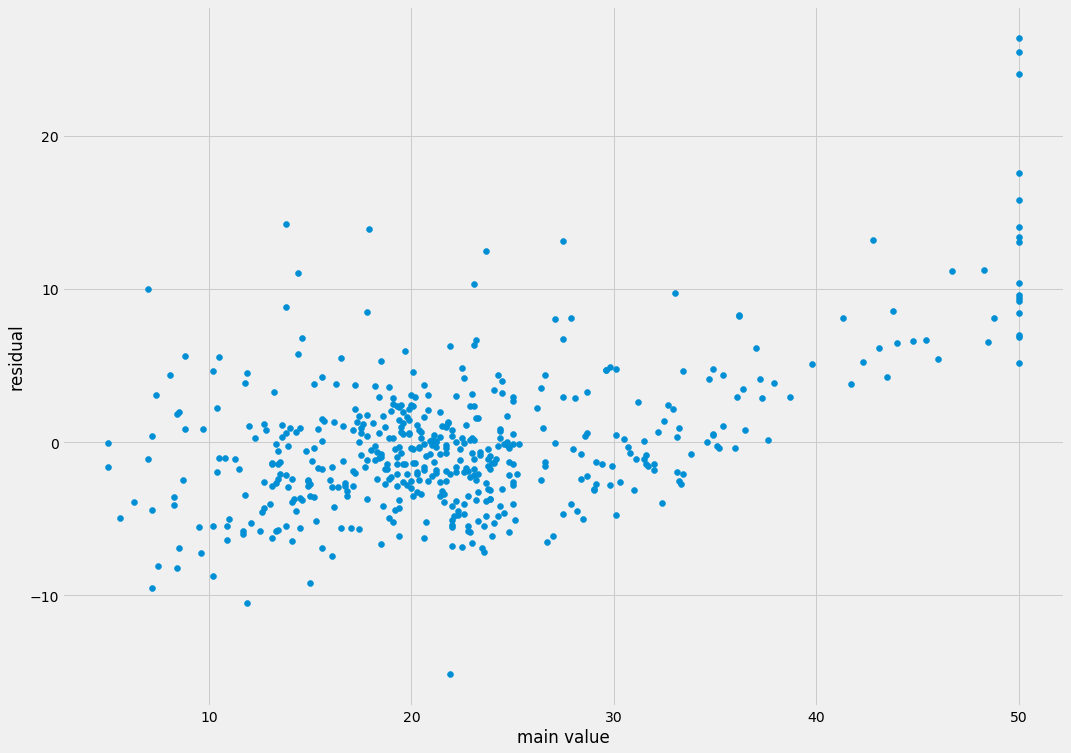

In [20]:
plt.scatter(df[["target"]].values,residual)
plt.xlabel("main value")
plt.ylabel("residual")
plt.show()

### No evident Pattern is obtained

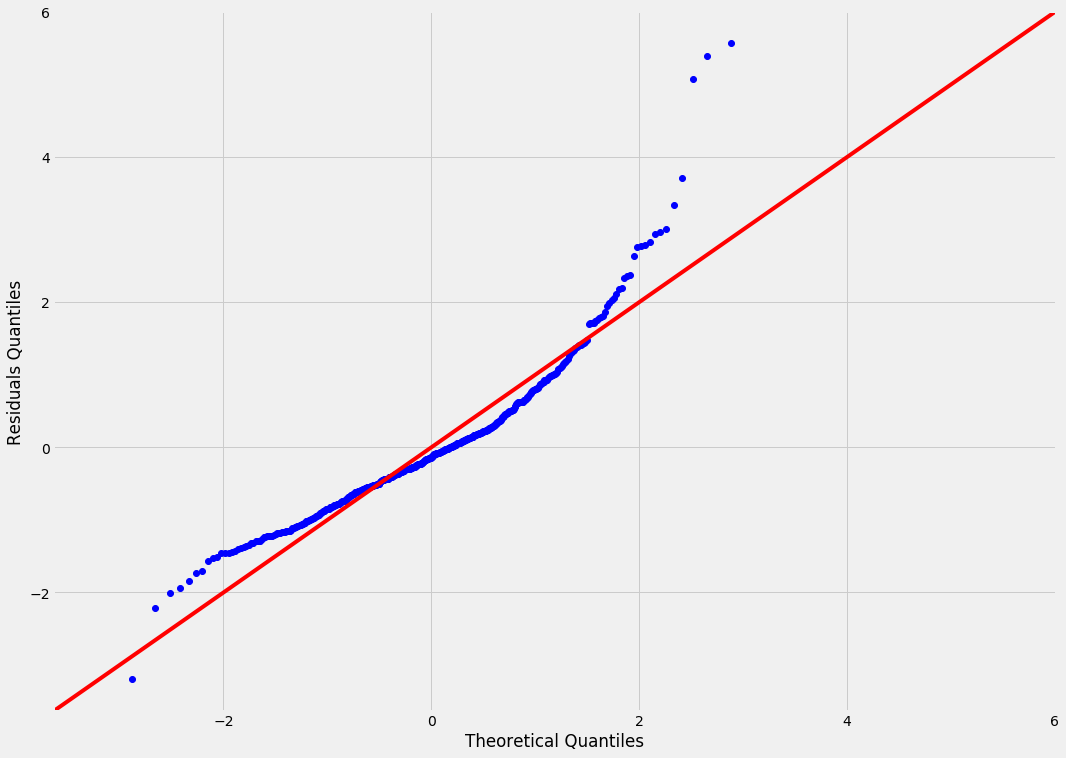

In [21]:
sm.qqplot(residual, fit= True, line ='45')
plt.ylabel("Residuals Quantiles")
plt.show()

Handling non-linearity problem
When the linear relationship does not hold we can either transform the data variables like log, exponential transformation or normalisation etc, as shown in previous parts. Also in such cases we can try to use suitable non linear regression models as well. Non linear regression models will be discussed in next parts.

There are some outliers, which can be removed and some non-linearity can also be braught into the model, us of interation terms etc.

---

What we learn !!!

1. Detecting collinearity
2. Diagnosing model fit
3. Assumptions of linear regression
4. Transforming features to fit non-linear relationships (scale your data, transform your data, using log, or powers)
5. Interaction terms (in your formula, use y ~ x1 + X2*x3 structure to introduce interactions)

And so much more!

Notes

You could certainly go very deep into linear regression, and learn how to apply it really, really well
It's an excellent way to start your modeling process when working a regression problem
However, it is limited by the fact that it can only make good predictions if there is a linear relationship between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression